In [1]:
# load the file
import sys
import io
import os

Dataset = "pubmed"

fileDir = "Data/"+Dataset+"/canopies/"
listfiles = os.listdir(fileDir)
all_line = 0
allformatedRecords = []


for file in listfiles:
    if not file.startswith('.'):
        with open(fileDir+file, 'r', encoding = 'utf8') as f:
            for line in f:
                all_line+=1
                read_data = line.split("\t")
                # some record's doi contain \r or \n character in which creating issue, since we do not use those, ignore it
                if(len(read_data)==13 or len(read_data)==12):
                    paper_detail = {"paperID": read_data[0], "authorID":read_data[1], "total_author": read_data[3],
                                    "author_name": read_data[4], "co_authors": read_data[5], "department": read_data[6],
                                    "venue": read_data[7], "mesh": read_data[8], "keywords": read_data[9], 
                                    "publish_year": read_data[10]}
                    allformatedRecords.append(paper_detail)
                else:
                    print(len(read_data))
        f.close()
error_line = len(allformatedRecords)-all_line
print("All line: ", all_line)
print("Error formate line: ", error_line)
print("Formated records: ", len(allformatedRecords))

2
2
All line:  4163774
Error formate line:  -2
Formated records:  4163772


In [2]:
print("Total records:",len(allformatedRecords), "records")
# find total number of papers using set
paperIDs = set()
# collect data missing condition
from collections import defaultdict
not_available_count = defaultdict(int)
for record in allformatedRecords:
    if(record["author_name"]==""):
        not_available_count["author name"]+=1
    if(record["total_author"]==""):
        not_available_count["total author"]+=1
    if(record["co_authors"]==""):
        not_available_count["co authors"]+=1
    if(record["department"]==""):
        not_available_count["department"]+=1
    if(record["venue"]==""):
        not_available_count["venue"]+=1
    if(record["mesh"]==""):
        not_available_count["mesh"]+=1
    if(record["keywords"]==""):
        not_available_count["keywords"]+=1
    if(record["publish_year"]==""):
        not_available_count["publish year"]+=1
    paperIDs.add(int(record["paperID"]))
    
print("Record have no author name: ", not_available_count["author name"])
print("Record have no total_author: ", not_available_count["total author"] )
print("Record have no venue: ", not_available_count["venue"])
print("Record have no co_authors: ", not_available_count["co authors"])
print("Record have no department: ", not_available_count["department"])
print("Record have no mesh: ", not_available_count["mesh"])
print("Record have no keywords: ", not_available_count["keywords"])
print("Record have no publish_year: ", not_available_count["publish year"])

Total records: 4163772 records
Record have no author name:  0
Record have no total_author:  0
Record have no venue:  0
Record have no co_authors:  132742
Record have no department:  2678926
Record have no mesh:  886569
Record have no keywords:  3414308
Record have no publish_year:  8


No handles with labels found to put in legend.


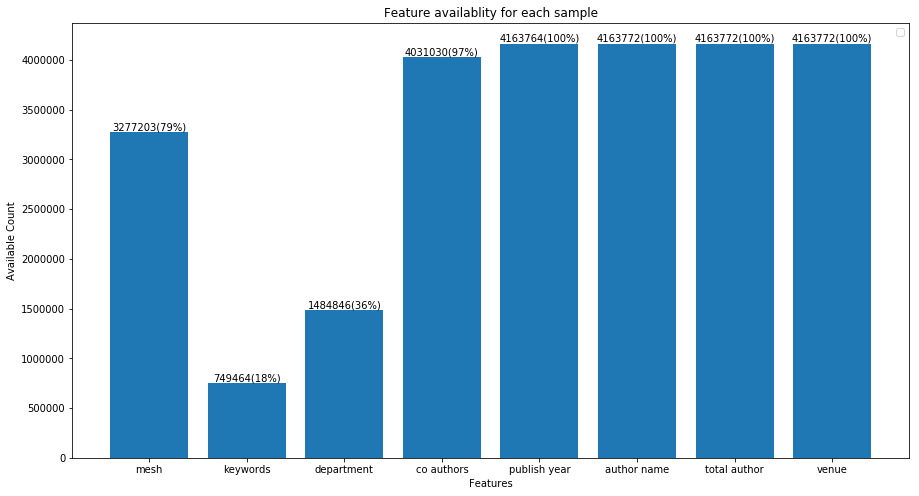

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# plot data missing
labels = list(not_available_count.keys())
count = [len(allformatedRecords)-count for count in list(not_available_count.values())]
# start plot
# Generating the y positions. Later, we'll use them to replace them with labels.
y_positions = range(len(labels))
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.bar(y_positions, count)
rects = ax.patches
for rect, count in zip(rects, count):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 5, str(count)+"("+"{0:.0%}".format(count/len(allformatedRecords))+")", ha = "center", va = "bottom")
#plt.xticks(labels)
plt.xticks(y_positions, labels)
plt.xlabel('Features')
plt.ylabel('Available Count')
plt.title('Feature availablity for each sample')
plt.legend()
plt.show()
#fig.savefig("../plot/statistic_figs/feature_availablity.png", dpi=fig.dpi)

In [4]:
def gather_abstract_title_info(filepath):
    count_no_title = 0
    count_no_abstract = 0
    count_total_papers = 0
    all_text_content = []
    with open(filepath, 'r', encoding = 'utf8') as f:
        for line in f:
            count_total_papers+=1
            items = line.split("\t")
            # lower case all character
            paperID = items[0]
            title = items[1].lower().strip()
            keywords = items[2].lower()
            mesh = items[3].lower()
            abstract = items[4].lower().strip()
            if(title==""):
                count_no_title+=1
            if(abstract==""):
                count_no_abstract+=1
            # text information can be defined as all feature combined
            content = title+" "+keywords+" "+mesh+" "+abstract
            paper_text_content = {"paperID": paperID, "title":title, "keywords":keywords, "mesh":mesh,
                                  "abstract": abstract, "combine_text":content}
            all_text_content.append(paper_text_content)
    f.close()
    return count_total_papers, count_no_title, count_no_abstract, all_text_content

extracted_total, num_no_title, num_no_abstract, all_text_content = gather_abstract_title_info("Data/"+Dataset+"/id_text_combined.txt")

All records(contain duplicate):  4163772
Extract paper count:  3151504
Number of extracted paper that do not have title:  1746
Number of extracted paper that do not have abstract:  450453
Total unique paper count:  3151504
[0, 3151504]


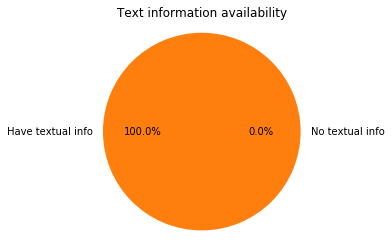

Total labeled record:  140266
Total labeled paper:  135796
Total ORCID (author) count:  9914
[0.033687243201597016, 0.966312756798403]


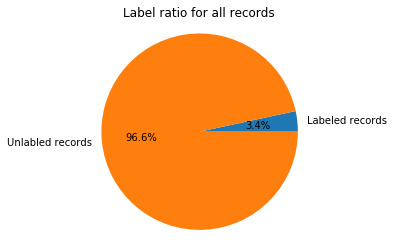

{'paperID': '25467590', 'title': 'effectiveness of screening for ebola at airports', 'keywords': '', 'mesh': 'air travel$$disease outbreaks$$ebolavirus$$hemorrhagic fever, ebola$$humans$$mass screening$$models, statistical', 'abstract': '', 'combine_text': 'effectiveness of screening for ebola at airports  air travel$$disease outbreaks$$ebolavirus$$hemorrhagic fever, ebola$$humans$$mass screening$$models, statistical '}


In [5]:
print("All records(contain duplicate): ", len(allformatedRecords))
print("Extract paper count: ",extracted_total)
print("Number of extracted paper that do not have title: ", num_no_title)
print("Number of extracted paper that do not have abstract: ", num_no_abstract)
# the paper id is not unique, we want to extract abstract with unique paper id 
paperIDs = sorted(paperIDs)
total_paper = len(paperIDs)
print("Total unique paper count: ",total_paper)
# plot real total paper count vs extract total count
no_text_paper = total_paper-extracted_total
text_info_avail = [no_text_paper, extracted_total]
print(text_info_avail)
fig2, ax2 = plt.subplots()
ax2.pie(text_info_avail, labels=["No textual info", "Have textual info"], autopct='%1.1f%%')
ax2.axis('equal')
plt.title('Text information availability')
plt.show()
# collect labeled data infomation
# collect unique author id
labeled_record = []
ORCID = []
for paper in allformatedRecords:
    if paper["authorID"]!=str(-1):
        labeled_record.append(int(paper["paperID"]))
        ORCID.append(paper["authorID"])
ORCID = set(ORCID)
labeled_paper = set(labeled_record)
print("Total labeled record: ", len(labeled_record))
print("Total labeled paper: ", len(labeled_paper))
print("Total ORCID (author) count: ",len(ORCID))
# collect labeled data vs all data
total_rec = len(allformatedRecords)
labeled_rec = len(labeled_record)
record_label_dist = [(labeled_rec/total_rec), ((total_rec-labeled_rec)/total_rec)]
print(record_label_dist)

fig1, ax1 = plt.subplots()
ax1.pie(record_label_dist, labels=["Labeled records", "Unlabled records"], autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Label ratio for all records')
#fig1.savefig("../plot/statistic_figs/all_record_labelled_ratio.png", dpi=150)
plt.show()

# combined text sample
print(all_text_content[7])

# collect statistic after preprocessing

In [22]:
import pandas as pd
# convert to dataframe so it's easy to process
all_text_content_df = pd.DataFrame(all_text_content)

In [24]:
import com_func
# title average token size after preprocess
cleaned_title, title_token_size= com_func.clean_batch_of_raw(all_text_content_df['title'], stopword=True)
# # abstract average token size after preprocess
# cleaned_abstract, abstract_token_size= com_func.clean_batch_of_raw(all_text_content_df['abstract'], stopword=True)
# # mesh average token size after preprocess
# cleaned_mesh, mesh_token_size= com_func.clean_batch_of_raw(all_text_content_df['mesh'], stopword=True)
# # keywords average token size after preprocess
# cleaned_keywords, keywords_token_size= com_func.clean_batch_of_raw(all_text_content_df['keywords'], stopword=True)
# # combined average token size after preprocess
# cleaned_text, text_token_size= com_func.clean_batch_of_raw(all_text_content_df['combine_text'], stopword=True)

In [26]:
import numpy as np
print(np.sum(title_token_size)/len(title_token_size))
print("max title token length: ", max(title_token_size))
print("min title token length: ", min(title_token_size))

print(np.sum(abstract_token_size)/len(abstract_token_size))
print("max abstract token length: ", max(abstract_token_size))
print("min title token length: ", min(abstract_token_size))

# print(np.sum(mesh_token_size)/len(mesh_token_size))
# print(np.sum(keywords_token_size)/len(keywords_token_size))
# print(np.sum(text_token_size)/len(text_token_size))

9.938808898862257
max title token length:  57
min title token length:  0
104.02582005290172
max abstract token length:  963
min title token length:  0
